# Lab : Using Convolutional Neural Networks (CNN) to identify digits

In this lab, we are going to setup a CNN to classify MNIST

## About MNIST Data

MNIST is a widely used dataset of hand written digits.

<img src="../assets/images/mnist-1.jpeg" />

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass


# Load the TensorBoard notebook extension
%load_ext tensorboard

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

In [2]:
# Install the package for running tensorboard on google colaboration
try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False

print ("Running in Google COLAB : ", IN_COLAB)


if IN_COLAB == True:
    from tensorboardcolab import *
    !pip install -U tensorboardcolab
# Load the TensorBoard notebook extension
    %load_ext tensorboard

Running in Google COLAB :  False


## Step 1: Download Data

In [3]:
mnist = tf.keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# backup just in case
(train_images2, train_labels2), (test_images2, test_labels2) = tf.keras.datasets.mnist.load_data()




print("train_images shape : ", train_images.shape)
print("train_labels shape : ", train_labels.shape)
print("test_images shape : ", test_images.shape)
print("test_labels shape : ", test_labels.shape)

train_images shape :  (60000, 28, 28)
train_labels shape :  (60000,)
test_images shape :  (10000, 28, 28)
test_labels shape :  (10000,)


## Step 2: Data Exploration

Displaying train index =  7959
train label [7959] = 7 
------------ raw data for train_image[7959] -------
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 128 191 255 255


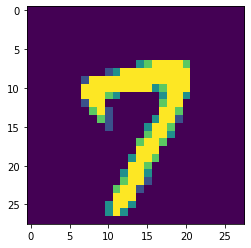

In [4]:
## Run this cell a few times to randomly display some digit data

import matplotlib.pyplot as plt
import random

index = random.randint(0, len(train_images))
# index = 10
print ("Displaying train index = ", index)

print("train label [{}] = {} ".format(index, train_labels[index]))
print ("------------ raw data for train_image[{}] -------".format(index))
print(train_images[index])
print ("--------------------")

plt.imshow(train_images[index])

## Step 3 : Shape Data

### 3.1 - Shape the array to 4 dimensional
ConvNets expect data in 4D.  Let's add a channel dimension to our data.

In [5]:
## Reshape to add 'channel'.
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

print("train_images shape : ", train_images.shape)
print("train_labels shape : ", train_labels.shape)
print("test_images shape : ", test_images.shape)
print("test_labels shape : ", test_labels.shape)

train_images shape :  (60000, 28, 28, 1)
train_labels shape :  (60000,)
test_images shape :  (10000, 28, 28, 1)
test_labels shape :  (10000,)


### 3.2 - Normalize Data
The images are stored as a 2D array of pixels.  
Each pixel is a value from 0 to 255  
We are going to normalize them in the range of 0 to 1

In [6]:
## Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [7]:
import matplotlib.pyplot as plt
import random

# index = random.randint(0, len(train_images))
# index = 10
print ("Displaying train index = ", index)

print("train label [{}] = {} ".format(index, train_labels[index]))
print ("------------ raw data for train_image[{}] (just printing first 3 rows) -------".format(index))
print(train_images[index][0:2])
print ("--------------------")

# plt.imshow(train_images[index])

Displaying train index =  7959
train label [7959] = 7 
------------ raw data for train_image[7959] (just printing first 3 rows) -------
[[[0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]]]
--------------------


## Step 4 : Create Model

### Neural Net Architecture

<img src="../assets/images/lenet-architecture.png" style="width:80%"/>

### 4.1 - Create a CNN

The code below define the convolutional base using a common pattern: a stack of [Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) and [MaxPooling2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D) layers.

As input, a CNN takes tensors of shape (image_height, image_width, color_channels), ignoring the batch size. If you are new to color channels, MNIST has one (because the images are grayscale), whereas a color image has three (R,G,B). In this example, we will configure our CNN to process inputs of shape (28, 28, 1), which is the format of MNIST images. We do this by passing the argument `input_shape` to our first layer.

In [8]:
model = tf.keras.Sequential( [ 
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu')
])

print (model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________
None


Above, you can see that the output of every Conv2D and MaxPooling2D layer is a 3D tensor of shape (height, width, channels). The width and height dimensions tend to shrink as we go deeper in the network. The number of output channels for each Conv2D layer is controlled by the first argument (e.g., 32 or 64). Typically,  as the width and height shrink, we can afford (computationally) to add more output channels in each Conv2D layer.

### 4.2 - Add Dense layers on top
To complete our model, we will feed the last output tensor from the convolutional base (of shape (3, 3, 64)) into one or more Dense layers to perform classification. Dense layers take vectors as input (which are 1D), while the current output is a 3D tensor. First, we will flatten (or unroll) the 3D output to 1D,  then add one or more Dense layers on top. MNIST has 10 output classes, so we use a final Dense layer with 10 outputs and a softmax activation.

In [9]:
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

### 4.3 - Compile and Train

In [10]:
model.compile(optimizer=tf.keras.optimizers.Adam(),  # 'adam'
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Step 5 - Setup Tensorboard

In [11]:
## This is fairly boiler plate code

import datetime
import os

app_name = 'cnn-mnist' # you can change this, if you like

tb_top_level_dir= '/tmp/tensorboard-logs'
tensorboard_logs_dir= os.path.join (tb_top_level_dir, app_name, 
                                    datetime.datetime.now().strftime("%Y-%m-%d--%H-%M-%S"))
print ("Saving TB logs to : " , tensorboard_logs_dir)

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=tensorboard_logs_dir, histogram_freq=1)


Saving TB logs to :  /tmp/tensorboard-logs/cnn-mnist/2020-02-05--18-51-15


## Step 6 : Train

In [12]:
%%time

epochs = 10

print ("training starting ...")
history = model.fit(train_images, train_labels, 
                    epochs=epochs, validation_split = 0.2, verbose=1,
                    callbacks=[tensorboard_callback])
print ("training done.")

training starting ...
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 70s 1ms/sample - loss: 0.1619 - accuracy: 0.9510 - val_loss: 0.0608 - val_accuracy: 0.9816
Epoch 2/10
48000/48000 [==============================] - 58s 1ms/sample - loss: 0.0516 - accuracy: 0.9838 - val_loss: 0.0498 - val_accuracy: 0.9849
Epoch 3/10
48000/48000 [==============================] - 47s 978us/sample - loss: 0.0361 - accuracy: 0.9884 - val_loss: 0.0409 - val_accuracy: 0.9869
Epoch 4/10
48000/48000 [==============================] - 35s 731us/sample - loss: 0.0270 - accuracy: 0.9912 - val_loss: 0.0457 - val_accuracy: 0.9877
Epoch 5/10
48000/48000 [==============================] - 37s 775us/sample - loss: 0.0213 - accuracy: 0.9932 - val_loss: 0.0429 - val_accuracy: 0.9872
Epoch 6/10
48000/48000 [==============================] - 39s 821us/sample - loss: 0.0183 - accuracy: 0.9936 - val_loss: 0.0383 - val_accuracy: 0.9902
Epoch 7/10
48000/48000 [==

## Step 7 : See Training History

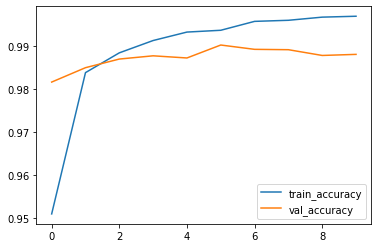

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

## Step 8 - Predict

**==> Compare prediction time vs training time.  Prediction is very quick!**

In [14]:
%%time 

print ("predicting on {:,} images".format(len(test_images)))
predictions = model.predict(test_images)


predicting on 10,000 images
CPU times: user 2.89 s, sys: 2.81 s, total: 5.7 s
Wall time: 1.71 s


random index =  5018
test_label[5018] = 2.  So the number is 2
prediction of test_image[5018] = [ 0.000  0.000  1.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000]
max softmax output =  1.0
index of max softmax output = 2.  So the prediction is same (2)


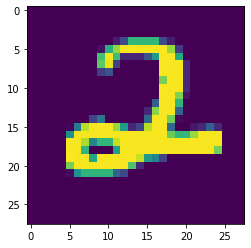

In [15]:
## Print a sample prediction

%matplotlib inline
import matplotlib.pyplot as plt
import random
import numpy as np
from pprint import pprint

np.set_printoptions(formatter={'float': '{: 0.3f}'.format})

index = random.randint(0, len(test_images))

print ("random index = ", index)
print ("test_label[{}] = {}.  So the number is {}".format(index, test_labels[index], test_labels[index]))
print ("prediction of test_image[{}] = {}".format(index, predictions[index]))
print ('max softmax output = ', np.amax(predictions[index]))
print ('index of max softmax output = {}.  So the prediction is same ({})'.format(np.argmax(predictions[index]), np.argmax(predictions[index])))

plt.imshow(test_images2[index])

## Step 9 : Evaluate the Model 

### 9.1 - Metrics

In [16]:
metric_names = model.metrics_names
print ("model metrics : " , metric_names)

metrics = model.evaluate(test_images, test_labels, verbose=0)

for idx, metric in enumerate(metric_names):
    print ("Metric : {} = {:,.3f}".format (metric_names[idx], metrics[idx]))

model metrics :  ['loss', 'accuracy']
Metric : loss = 0.049
Metric : accuracy = 0.988


### 9.2 - Confusion Matrix

In [17]:
## our predictions is an array of arrays
print('predictions shape : ', predictions.shape)
print ('prediction 0 : ' , predictions[0])
print ('prediction 1 : ' , predictions[1])

predictions shape :  (10000, 10)
prediction 0 :  [ 0.000  0.000  0.000  0.000  0.000  0.000  0.000  1.000  0.000  0.000]
prediction 1 :  [ 0.000  0.000  1.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000]


In [18]:
## We need to find the final output (max of softmax probabilities for each prediction)
predictions2 = [ np.argmax(p) for p in predictions]
print ('prediction2 0 : ' , predictions2[0])
print ('prediction2 1 : ' , predictions2[1])

prediction2 0 :  7
prediction2 1 :  2


In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(test_labels, predictions2, labels = [0,1,2,3,4,5,6,7,8,9])
cm

array([[ 977,    1,    0,    0,    0,    0,    0,    2,    0,    0],
       [   0, 1133,    0,    1,    0,    0,    0,    0,    0,    1],
       [   2,    1, 1019,    0,    0,    0,    0,    8,    2,    0],
       [   0,    0,    1, 1007,    0,    1,    0,    1,    0,    0],
       [   3,    1,    1,    0,  956,    0,    1,    1,    0,   19],
       [   2,    0,    0,   14,    0,  869,    1,    2,    1,    3],
       [  17,    3,    1,    0,    1,    1,  933,    0,    1,    1],
       [   0,    1,    4,    1,    0,    0,    0, 1020,    0,    2],
       [   2,    0,    1,    0,    1,    0,    0,    1,  967,    2],
       [   2,    0,    0,    0,    1,    2,    0,    4,    2,  998]])

[]

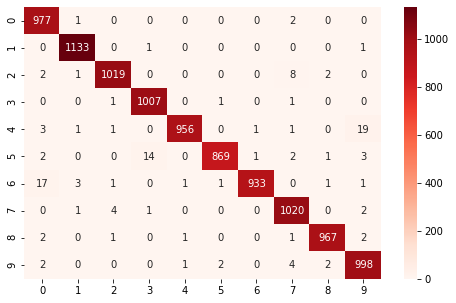

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (8,6))

# colormaps : cmap="YlGnBu" , cmap="Greens", cmap="Blues",  cmap="Reds"
sns.heatmap(cm, annot=True, cmap="Reds", fmt='d').plot()

### 9.3 - Metrics Calculated from Confusion Matrix

In [21]:
from sklearn.metrics import classification_report
from pprint import pprint

pprint(classification_report(test_labels, predictions2, output_dict=True))

{'0': {'f1-score': 0.9843828715365239,
       'precision': 0.972139303482587,
       'recall': 0.996938775510204,
       'support': 980},
 '1': {'f1-score': 0.9960439560439561,
       'precision': 0.993859649122807,
       'recall': 0.9982378854625551,
       'support': 1135},
 '2': {'f1-score': 0.989800874210782,
       'precision': 0.9922103213242454,
       'recall': 0.9874031007751938,
       'support': 1032},
 '3': {'f1-score': 0.9906542056074766,
       'precision': 0.9843597262952102,
       'recall': 0.997029702970297,
       'support': 1010},
 '4': {'f1-score': 0.985059247810407,
       'precision': 0.9968717413972888,
       'recall': 0.9735234215885947,
       'support': 982},
 '5': {'f1-score': 0.9847025495750708,
       'precision': 0.995418098510882,
       'recall': 0.9742152466367713,
       'support': 892},
 '6': {'f1-score': 0.9857369255150554,
       'precision': 0.9978609625668449,
       'recall': 0.9739039665970772,
       'support': 958},
 '7': {'f1-score': 0.986

## Step 10 : Improve the Model

Try the following exercises

**1 - Increase epochs**  
- In Step-6, increase epochs to 10
- Rerun the notebook
- did the accuracy improve?
- how much the training time go up?